**Create Image Labels**

In [19]:
import numpy as np
import cv2
import tensorflow as tf
import os
import math
import pandas as pd
import matplotlib.image as img
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [20]:
# all the raw images are in the folder of DATA_DIR_IN
# labels are in csv files
# image_folder_1.csv
# image_folder_2.csv
# image_folder_4.csv

In [21]:
#DATA_DIR_IN = "./Data/1-1175/"
DATA_DIR_IN = "./Data/total_raw_data/"

In [22]:
image_label = pd.read_csv('image_folder_1.csv',header=None,sep = ";", dtype=str)
#image_label.dropna()

In [23]:
image_label[0:5]

,0,1
0,Three1_00001.jpg,00063
1,Three1_00002.jpg,07028
2,Three1_00003.jpg,08221
3,Three1_00004.jpg,03244
4,Three1_00005.jpg,00025


In [24]:
image_label2 = pd.read_csv('image_folder_2.csv',header=None,sep = ";", dtype=str)
#image_label2.dropna()

In [25]:
image_label2[0:5]

,0,1
0,Three2_00001.jpg,01885
1,Three2_00002.jpg,00492
2,Three2_00003.jpg,03741
3,Three2_00004.jpg,05676
4,Three2_00006.jpg,00857


In [26]:
type(image_label2)

pandas.core.frame.DataFrame

In [27]:
image_label4 = pd.read_csv('image_folder_4.csv',header=None,sep = ";", dtype=str)
print(image_label4.shape)
image_label4 = image_label4.dropna()
image_label4.shape

(1456, 2)


(1238, 2)

In [28]:
image_label_dict = dict(image_label.values.tolist())
image_label_dict2 = dict(image_label2.values.tolist())
image_label_dict4 = dict(image_label4.values.tolist())

In [29]:
image_label_dict_total = {}
image_label_dict_total.update(image_label_dict)
image_label_dict_total.update(image_label_dict2)
image_label_dict_total.update(image_label_dict4)
len(image_label_dict_total)

2916

In [30]:
import os
import sys
import argparse
import json
import itertools
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from PIL import Image
import IPython.display as display
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.datasets import load_digits
from sklearn.preprocessing import MultiLabelBinarizer
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.backend as K
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, BatchNormalization, Dropout, Flatten
from tensorflow.keras.models import Sequential

In [31]:
def rgb2gray(img):
    return np.dot(np.array(img, dtype='float32'), [0.299, 0.587, 0.114]) 

In [32]:
#Image.open("./../data/1-1175/Three1_00011.jpg")

In [33]:
def get_dataset(data_map):
  
    dataset = np.ndarray(shape=(len(data_map), 100, 100), dtype='float32')
    print(dataset.shape)
    #labels = np.ones(shape=(len(data_map), 5), dtype='int') * 10 
    labels = np.zeros(shape=(len(data_map), 5), dtype='int') 
    
    width_height = (100, 100) 
    # 	Three1_00020.jpg	00096
    for i, image_name in enumerate(data_map):
        print(i, DATA_DIR_IN+image_name)
        label = data_map[image_name]
        print(label)
        if label != label or len(label) != 5:
            continue
        try:
            image = Image.open(DATA_DIR_IN+image_name) 
        except:
            continue
        label_array = []
        for n, num in enumerate(label):
            #print(n, num )
            label_array.append(num)
        resized_img = image.resize(width_height)
        img_array = rgb2gray(resized_img)
        dataset[i,:,:] = img_array[:,:]
        labels[i,:] = label_array
    print('dataset:',dataset.shape)
    print('labels:',labels.shape)
    return dataset, labels

In [34]:
width_height = (100, 100)
image = Image.open(DATA_DIR_IN+'Three2_00894.jpg') 
resized_img = image.resize(width_height)

In [35]:
dataset, labels = get_dataset(image_label_dict_total)

(2916, 100, 100)
0 ./Data/total_raw_data/Three1_00001.jpg
00063
1 ./Data/total_raw_data/Three1_00002.jpg
07028
2 ./Data/total_raw_data/Three1_00003.jpg
08221
3 ./Data/total_raw_data/Three1_00004.jpg
03244
4 ./Data/total_raw_data/Three1_00005.jpg
00025
5 ./Data/total_raw_data/Three1_00006.jpg
00044
6 ./Data/total_raw_data/Three1_00007.jpg
00003
7 ./Data/total_raw_data/Three1_00008.jpg
00038
8 ./Data/total_raw_data/Three1_00009.jpg
00320
9 ./Data/total_raw_data/Three1_00010.jpg
00000
10 ./Data/total_raw_data/Three1_00011.jpg
00061
11 ./Data/total_raw_data/Three1_00012.jpg
00025
12 ./Data/total_raw_data/Three1_00013.jpg
00842
13 ./Data/total_raw_data/Three1_00014.jpg
00105
14 ./Data/total_raw_data/Three1_00015.jpg
00271
15 ./Data/total_raw_data/Three1_00016.jpg
03598
16 ./Data/total_raw_data/Three1_00017.jpg
00219
17 ./Data/total_raw_data/Three1_00018.jpg
00047
18 ./Data/total_raw_data/Three1_00019.jpg
00077
19 ./Data/total_raw_data/Three1_00020.jpg
00096
20 ./Data/total_raw_data/Three1_0

170 ./Data/total_raw_data/Three1_00193.jpg
02464
171 ./Data/total_raw_data/Three1_00194.jpg
03168
172 ./Data/total_raw_data/Three1_00195.jpg
01157
173 ./Data/total_raw_data/Three1_00196.jpg
03110
174 ./Data/total_raw_data/Three1_00197.jpg
07769
175 ./Data/total_raw_data/Three1_00198.jpg
05721
176 ./Data/total_raw_data/Three1_00199.jpg
07614
177 ./Data/total_raw_data/Three1_00200.jpg
01538
178 ./Data/total_raw_data/Three1_00201.jpg
01352
179 ./Data/total_raw_data/Three1_00202.jpg
07989
180 ./Data/total_raw_data/Three1_00203.jpg
03931
181 ./Data/total_raw_data/Three1_00204.jpg
07706
182 ./Data/total_raw_data/Three1_00205.jpg
09139
183 ./Data/total_raw_data/Three1_00206.jpg
00342
184 ./Data/total_raw_data/Three1_00207.jpg
10138
185 ./Data/total_raw_data/Three1_00208.jpg
04873
186 ./Data/total_raw_data/Three1_00209.jpg
00974
187 ./Data/total_raw_data/Three1_00210.jpg
00539
188 ./Data/total_raw_data/Three1_00211.jpg
02238
189 ./Data/total_raw_data/Three1_00212.jpg
00626
190 ./Data/total_raw

338 ./Data/total_raw_data/Three1_00401.jpg
00443
339 ./Data/total_raw_data/Three1_00402.jpg
01570
340 ./Data/total_raw_data/Three1_00404.jpg
03737
341 ./Data/total_raw_data/Three1_00406.jpg
00900
342 ./Data/total_raw_data/Three1_00407.jpg
00629
343 ./Data/total_raw_data/Three1_00408.jpg
00227
344 ./Data/total_raw_data/Three1_00409.jpg
02976
345 ./Data/total_raw_data/Three1_00410.jpg
03029
346 ./Data/total_raw_data/Three1_00411.jpg
02363
347 ./Data/total_raw_data/Three1_00412.jpg
02516
348 ./Data/total_raw_data/Three1_00413.jpg
00290
349 ./Data/total_raw_data/Three1_00414.jpg
00724
350 ./Data/total_raw_data/Three1_00416.jpg
00878
351 ./Data/total_raw_data/Three1_00417.jpg
00516
352 ./Data/total_raw_data/Three1_00418.jpg
01255
353 ./Data/total_raw_data/Three1_00419.jpg
01978
354 ./Data/total_raw_data/Three1_00420.jpg
04023
355 ./Data/total_raw_data/Three1_00421.jpg
00175
356 ./Data/total_raw_data/Three1_00422.jpg
01960
357 ./Data/total_raw_data/Three1_00423.jpg
00941
358 ./Data/total_raw

506 ./Data/total_raw_data/Three1_00604.jpg
00079
507 ./Data/total_raw_data/Three1_00605.jpg
00358
508 ./Data/total_raw_data/Three1_00606.jpg
00458
509 ./Data/total_raw_data/Three1_00607.jpg
00105
510 ./Data/total_raw_data/Three1_00608.jpg
00182
511 ./Data/total_raw_data/Three1_00609.jpg
00417
512 ./Data/total_raw_data/Three1_00610.jpg
00203
513 ./Data/total_raw_data/Three1_00611.jpg
00365
514 ./Data/total_raw_data/Three1_00612.jpg
00111
515 ./Data/total_raw_data/Three1_00613.jpg
00238
516 ./Data/total_raw_data/Three1_00614.jpg
00376
517 ./Data/total_raw_data/Three1_00615.jpg
00335
518 ./Data/total_raw_data/Three1_00616.jpg
00149
519 ./Data/total_raw_data/Three1_00617.jpg
00108
520 ./Data/total_raw_data/Three1_00618.jpg
00113
521 ./Data/total_raw_data/Three1_00619.jpg
00246
522 ./Data/total_raw_data/Three1_00620.jpg
00052
523 ./Data/total_raw_data/Three1_00621.jpg
00057
524 ./Data/total_raw_data/Three1_00622.jpg
00123
525 ./Data/total_raw_data/Three1_00623.jpg
00213
526 ./Data/total_raw

674 ./Data/total_raw_data/Three1_00774.jpg
11828
675 ./Data/total_raw_data/Three1_00775.jpg
24018
676 ./Data/total_raw_data/Three1_00776.jpg
10658
677 ./Data/total_raw_data/Three1_00777.jpg
16469
678 ./Data/total_raw_data/Three1_00778.jpg
16420
679 ./Data/total_raw_data/Three1_00779.jpg
12148
680 ./Data/total_raw_data/Three1_00780.jpg
17550
681 ./Data/total_raw_data/Three1_00781.jpg
14788
682 ./Data/total_raw_data/Three1_00782.jpg
11310
683 ./Data/total_raw_data/Three1_00784.jpg
16314
684 ./Data/total_raw_data/Three1_00786.jpg
12813
685 ./Data/total_raw_data/Three1_00787.jpg
07127
686 ./Data/total_raw_data/Three1_00788.jpg
12418
687 ./Data/total_raw_data/Three1_00789.jpg
12206
688 ./Data/total_raw_data/Three1_00790.jpg
10512
689 ./Data/total_raw_data/Three1_00791.jpg
08487
690 ./Data/total_raw_data/Three1_00792.jpg
11336
691 ./Data/total_raw_data/Three1_00793.jpg
09426
692 ./Data/total_raw_data/Three1_00794.jpg
08481
693 ./Data/total_raw_data/Three1_00795.jpg
12570
694 ./Data/total_raw

842 ./Data/total_raw_data/Three1_00966.jpg
00458
843 ./Data/total_raw_data/Three1_00967.jpg
00914
844 ./Data/total_raw_data/Three1_00968.jpg
00422
845 ./Data/total_raw_data/Three1_00969.jpg
00632
846 ./Data/total_raw_data/Three1_00970.jpg
01079
847 ./Data/total_raw_data/Three1_00971.jpg
00281
848 ./Data/total_raw_data/Three1_00972.jpg
01359
849 ./Data/total_raw_data/Three1_00973.jpg
00125
850 ./Data/total_raw_data/Three1_00974.jpg
00709
851 ./Data/total_raw_data/Three1_00975.jpg
00929
852 ./Data/total_raw_data/Three1_00976.jpg
00688
853 ./Data/total_raw_data/Three1_00977.jpg
00792
854 ./Data/total_raw_data/Three1_00978.jpg
01236
855 ./Data/total_raw_data/Three1_00979.jpg
01831
856 ./Data/total_raw_data/Three1_00980.jpg
01178
857 ./Data/total_raw_data/Three1_00981.jpg
00628
858 ./Data/total_raw_data/Three1_00982.jpg
00604
859 ./Data/total_raw_data/Three1_00983.jpg
00420
860 ./Data/total_raw_data/Three1_00984.jpg
01793
861 ./Data/total_raw_data/Three1_00985.jpg
00805
862 ./Data/total_raw

1010 ./Data/total_raw_data/Three2_00015.jpg
03055
1011 ./Data/total_raw_data/Three2_00017.jpg
00955
1012 ./Data/total_raw_data/Three2_00018.jpg
00328
1013 ./Data/total_raw_data/Three2_00019.jpg
00262
1014 ./Data/total_raw_data/Three2_00020.jpg
02568
1015 ./Data/total_raw_data/Three2_00021.jpg
03252
1016 ./Data/total_raw_data/Three2_00022.jpg
00110
1017 ./Data/total_raw_data/Three2_00023.jpg
01485
1018 ./Data/total_raw_data/Three2_00024.jpg
00370
1019 ./Data/total_raw_data/Three2_00025.jpg
01497
1020 ./Data/total_raw_data/Three2_00026.jpg
00022
1021 ./Data/total_raw_data/Three2_00027.jpg
01210
1022 ./Data/total_raw_data/Three2_00028.jpg
00110
1023 ./Data/total_raw_data/Three2_00029.jpg
02840
1024 ./Data/total_raw_data/Three2_00030.jpg
00238
1025 ./Data/total_raw_data/Three2_00031.jpg
02408
1026 ./Data/total_raw_data/Three2_00032.jpg
00270
1027 ./Data/total_raw_data/Three2_00033.jpg
03854
1028 ./Data/total_raw_data/Three2_00035.jpg
00339
1029 ./Data/total_raw_data/Three2_00036.jpg
03865


1174 ./Data/total_raw_data/Three2_00224.jpg
02338
1175 ./Data/total_raw_data/Three2_00225.jpg
02179
1176 ./Data/total_raw_data/Three2_00226.jpg
03244
1177 ./Data/total_raw_data/Three2_00227.jpg
01488
1178 ./Data/total_raw_data/Three2_00228.jpg
01785
1179 ./Data/total_raw_data/Three2_00229.jpg
00601
1180 ./Data/total_raw_data/Three2_00230.jpg
01227
1181 ./Data/total_raw_data/Three2_00231.jpg
00962
1182 ./Data/total_raw_data/Three2_00233.jpg
01166
1183 ./Data/total_raw_data/Three2_00234.jpg
01561
1184 ./Data/total_raw_data/Three2_00235.jpg
01538
1185 ./Data/total_raw_data/Three2_00236.jpg
01404
1186 ./Data/total_raw_data/Three2_00237.jpg
01064
1187 ./Data/total_raw_data/Three2_00238.jpg
02471
1188 ./Data/total_raw_data/Three2_00239.jpg
02776
1189 ./Data/total_raw_data/Three2_00240.jpg
02428
1190 ./Data/total_raw_data/Three2_00242.jpg
03544
1191 ./Data/total_raw_data/Three2_00244.jpg
02775
1192 ./Data/total_raw_data/Three2_00245.jpg
01948
1193 ./Data/total_raw_data/Three2_00247.jpg
00041


1338 ./Data/total_raw_data/Three2_00439.jpg
00010
1339 ./Data/total_raw_data/Three2_00440.jpg
00016
1340 ./Data/total_raw_data/Three2_00441.jpg
00016
1341 ./Data/total_raw_data/Three2_00442.jpg
00017
1342 ./Data/total_raw_data/Three2_00443.jpg
00001
1343 ./Data/total_raw_data/Three2_00444.jpg
00001
1344 ./Data/total_raw_data/Three2_00445.jpg
00004
1345 ./Data/total_raw_data/Three2_00448.jpg
00356
1346 ./Data/total_raw_data/Three2_00449.jpg
00043
1347 ./Data/total_raw_data/Three2_00454.jpg
00420
1348 ./Data/total_raw_data/Three2_00455.jpg
00723
1349 ./Data/total_raw_data/Three2_00457.jpg
02119
1350 ./Data/total_raw_data/Three2_00461.jpg
02513
1351 ./Data/total_raw_data/Three2_00463.jpg
04349
1352 ./Data/total_raw_data/Three2_00465.jpg
26348
1353 ./Data/total_raw_data/Three2_00466.jpg
78233
1354 ./Data/total_raw_data/Three2_00470.jpg
39317
1355 ./Data/total_raw_data/Three2_00483.jpg
00374
1356 ./Data/total_raw_data/Three2_00484.jpg
04113
1357 ./Data/total_raw_data/Three2_00485.jpg
00242


1502 ./Data/total_raw_data/Three2_00679.jpg
00375
1503 ./Data/total_raw_data/Three2_00680.jpg
00330
1504 ./Data/total_raw_data/Three2_00681.jpg
00582
1505 ./Data/total_raw_data/Three2_00682.jpg
01451
1506 ./Data/total_raw_data/Three2_00688.jpg
00056
1507 ./Data/total_raw_data/Three2_00689.jpg
00893
1508 ./Data/total_raw_data/Three2_00690.jpg
12753
1509 ./Data/total_raw_data/Three2_00691.jpg
00310
1510 ./Data/total_raw_data/Three2_00692.jpg
01052
1511 ./Data/total_raw_data/Three2_00693.jpg
07722
1512 ./Data/total_raw_data/Three2_00694.jpg
01284
1513 ./Data/total_raw_data/Three2_00695.jpg
03201
1514 ./Data/total_raw_data/Three2_00696.jpg
01033
1515 ./Data/total_raw_data/Three2_00699.jpg
02800
1516 ./Data/total_raw_data/Three2_00700.jpg
00828
1517 ./Data/total_raw_data/Three2_00701.jpg
00238
1518 ./Data/total_raw_data/Three2_00702.jpg
00287
1519 ./Data/total_raw_data/Three2_00703.jpg
02081
1520 ./Data/total_raw_data/Three2_00704.jpg
01507
1521 ./Data/total_raw_data/Three2_00705.jpg
02301


1666 ./Data/total_raw_data/Three2_00879.jpg
42599
1667 ./Data/total_raw_data/Three2_00882.jpg
00355
1668 ./Data/total_raw_data/Three2_00883.jpg
00075
1669 ./Data/total_raw_data/Three2_00884.jpg
00235
1670 ./Data/total_raw_data/Three2_00885.jpg
00366
1671 ./Data/total_raw_data/Three2_00886.jpg
00442
1672 ./Data/total_raw_data/Three2_00887.jpg
00509
1673 ./Data/total_raw_data/Three2_00888.jpg
00291
1674 ./Data/total_raw_data/Three2_00889.jpg
00651
1675 ./Data/total_raw_data/Three2_00890.jpg
00320
1676 ./Data/total_raw_data/Three2_00891.jpg
00164
1677 ./Data/total_raw_data/Three2_00892.jpg
00310
1678 ./Data/total_raw_data/Three4_00000.jpg
11956
1679 ./Data/total_raw_data/Three4_00001.jpg
15116
1680 ./Data/total_raw_data/Three4_00011.jpg
24435
1681 ./Data/total_raw_data/Three4_00015.jpg
09851
1682 ./Data/total_raw_data/Three4_00017.jpg
15350
1683 ./Data/total_raw_data/Three4_00022.jpg
00185
1684 ./Data/total_raw_data/Three4_00023.jpg
03051
1685 ./Data/total_raw_data/Three4_00026.jpg
17337


1830 ./Data/total_raw_data/Three4_00211.jpg
00982
1831 ./Data/total_raw_data/Three4_00214.jpg
01664
1832 ./Data/total_raw_data/Three4_00219.jpg
00246
1833 ./Data/total_raw_data/Three4_00220.jpg
00427
1834 ./Data/total_raw_data/Three4_00221.jpg
00192
1835 ./Data/total_raw_data/Three4_00222.jpg
00130
1836 ./Data/total_raw_data/Three4_00223.jpg
03456
1837 ./Data/total_raw_data/Three4_00224.jpg
07738
1838 ./Data/total_raw_data/Three4_00235.jpg
11142
1839 ./Data/total_raw_data/Three4_00236.jpg
00172
1840 ./Data/total_raw_data/Three4_00238.jpg
00327
1841 ./Data/total_raw_data/Three4_00239.jpg
00334
1842 ./Data/total_raw_data/Three4_00241.jpg
00286
1843 ./Data/total_raw_data/Three4_00246.jpg
00485
1844 ./Data/total_raw_data/Three4_00265.jpg
01927
1845 ./Data/total_raw_data/Three4_00270.jpg
00157
1846 ./Data/total_raw_data/Three4_00272.jpg
00982
1847 ./Data/total_raw_data/Three4_00276.jpg
00004
1848 ./Data/total_raw_data/Three4_00278.jpg
00746
1849 ./Data/total_raw_data/Three4_00279.jpg
00312


1994 ./Data/total_raw_data/Three4_00455.jpg
00683
1995 ./Data/total_raw_data/Three4_00456.jpg
00518
1996 ./Data/total_raw_data/Three4_00457.jpg
00982
1997 ./Data/total_raw_data/Three4_00458.jpg
00454
1998 ./Data/total_raw_data/Three4_00459.jpg
00789


OSError: image file is truncated (7 bytes not processed)

[0 0 0 0 0]


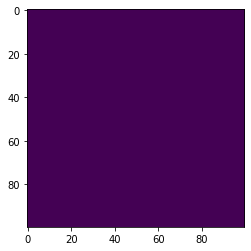

In [36]:
plt.imshow(dataset[2,:,:])
print(labels[2])

In [37]:
dataset = dataset[..., np.newaxis]

In [38]:
def prepare_final_data(x_train, y_train):
    x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.2)
    print(x_train.shape[0], "train samples")
    print(x_valid.shape[0], "valid samples")
    return {
        "x_train": x_train,
        "y_train": y_train,
        "x_valid": x_valid,
        "y_valid": y_valid
    }

In [39]:
ds = prepare_final_data(dataset, labels)

2332 train samples
584 valid samples


In [40]:
x_train, y_train, x_valid, y_valid = ds["x_train"], ds["y_train"], ds["x_valid"], ds["y_valid"]

In [41]:
print(x_train.shape, y_train.shape, x_valid.shape, y_valid.shape)

(2332, 100, 100, 1) (2332, 5) (584, 100, 100, 1) (584, 5)


In [42]:
batch_size = 32
img_height = 100
img_width = 100

In [43]:
x =tf.keras.layers.Input(shape=(100, 100, 1))
y= tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(x)
y=tf.keras.layers.Conv2D(64, (3,3), activation='relu')(y)
y=tf.keras.layers.MaxPooling2D(2, 2)(y)
    # The second convolution
y=tf.keras.layers.Conv2D(64, (3,3), activation='relu')(y)
y=tf.keras.layers.MaxPooling2D(2,2)(y)
    # The third convolution
y=tf.keras.layers.Conv2D(128, (3,3), activation='relu')(y)
y=tf.keras.layers.MaxPooling2D(2,2)(y)
    # The fourth convolution
y=tf.keras.layers.Conv2D(128, (3,3), activation='relu')(y)
y=tf.keras.layers.MaxPooling2D(2,2)(y)
    # Flatten the results to feed into a DNN
y=tf.keras.layers.Flatten()(y)
y=tf.keras.layers.Dropout(0.5)(y)
    # 512 neuron hidden layer
y=tf.keras.layers.Dense(512, activation='relu')(y)

out_num = 10
digit1 = tf.keras.layers.Dense(out_num, activation="softmax", name="digit1")(y)
digit2 = tf.keras.layers.Dense(out_num, activation="softmax", name="digit2")(y)
digit3 = tf.keras.layers.Dense(out_num, activation="softmax", name="digit3")(y)
digit4 = tf.keras.layers.Dense(out_num, activation="softmax", name="digit4")(y)
digit5 = tf.keras.layers.Dense(out_num, activation="softmax", name="digit5")(y)

model = tf.keras.Model(inputs=x, outputs=[digit1, digit2, digit3, digit4, digit5])

In [44]:
model.compile(
  optimizer='adam',
  loss=tf.losses.CategoricalCrossentropy(),
  metrics=['accuracy'])

In [45]:
    def convert_labels(classes, labels):
        digit1 = np.ndarray(shape=(len(labels), classes))
        digit2 = np.ndarray(shape=(len(labels), classes))
        digit3 = np.ndarray(shape=(len(labels), classes))
        digit4 = np.ndarray(shape=(len(labels), classes))
        digit5 = np.ndarray(shape=(len(labels), classes))
        
        for idx, label in enumerate(labels):
            print(idx, label)
            digit1[idx,:] = to_categorical(label[0], classes)
            digit2[idx,:] = to_categorical(label[1], classes)
            digit3[idx,:] = to_categorical(label[2], classes)
            digit4[idx,:] = to_categorical(label[3], classes)
            digit5[idx,:] = to_categorical(label[4], classes)
            
        return [digit1, digit2, digit3, digit4, digit5]

In [46]:
from tensorflow.keras.utils import to_categorical
y_train = convert_labels(out_num, y_train)
y_valid = convert_labels(out_num, y_valid)

0 [0 0 0 0 0]
1 [0 0 0 0 0]
2 [0 0 0 0 0]
3 [0 0 0 0 0]
4 [0 0 0 0 0]
5 [0 0 0 0 0]
6 [0 0 0 0 0]
7 [0 0 0 0 0]
8 [0 0 0 0 0]
9 [0 0 0 0 0]
10 [0 0 0 0 0]
11 [0 0 0 0 0]
12 [0 0 0 0 0]
13 [0 0 0 0 0]
14 [0 0 0 0 0]
15 [0 0 0 0 0]
16 [0 0 0 0 0]
17 [0 0 0 0 0]
18 [0 0 0 0 0]
19 [0 0 0 0 0]
20 [0 0 0 0 0]
21 [0 0 0 0 0]
22 [0 0 0 0 0]
23 [0 0 0 0 0]
24 [0 0 0 0 0]
25 [0 0 0 0 0]
26 [0 0 0 0 0]
27 [0 0 0 0 0]
28 [0 0 0 0 0]
29 [0 0 0 0 0]
30 [0 0 0 0 0]
31 [0 0 0 0 0]
32 [0 0 0 0 0]
33 [0 0 0 0 0]
34 [0 0 0 0 0]
35 [0 0 0 0 0]
36 [0 0 0 0 0]
37 [0 0 0 0 0]
38 [0 0 0 0 0]
39 [0 0 0 0 0]
40 [0 0 0 0 0]
41 [0 0 0 0 0]
42 [0 0 0 0 0]
43 [0 0 0 0 0]
44 [0 0 0 0 0]
45 [0 0 0 0 0]
46 [0 0 0 0 0]
47 [0 0 0 0 0]
48 [0 0 0 0 0]
49 [0 0 0 0 0]
50 [0 0 0 0 0]
51 [0 0 0 0 0]
52 [0 0 0 0 0]
53 [0 0 0 0 0]
54 [0 0 0 0 0]
55 [0 0 0 0 0]
56 [0 0 0 0 0]
57 [0 0 0 0 0]
58 [0 0 0 0 0]
59 [0 0 0 0 0]
60 [0 0 0 0 0]
61 [0 0 0 0 0]
62 [0 0 0 0 0]
63 [0 0 0 0 0]
64 [0 0 0 0 0]
65 [0 0 0 0 0]
66 [0 0 0 0 0]
67 [0

562 [0 0 0 0 0]
563 [0 0 0 0 0]
564 [0 0 0 0 0]
565 [0 0 0 0 0]
566 [0 0 0 0 0]
567 [0 0 0 0 0]
568 [0 0 0 0 0]
569 [0 0 0 0 0]
570 [0 0 0 0 0]
571 [0 0 0 0 0]
572 [0 0 0 0 0]
573 [0 0 0 0 0]
574 [0 0 0 0 0]
575 [0 0 0 0 0]
576 [0 0 0 0 0]
577 [0 0 0 0 0]
578 [0 0 0 0 0]
579 [0 0 0 0 0]
580 [0 0 0 0 0]
581 [0 0 0 0 0]
582 [0 0 0 0 0]
583 [0 0 0 0 0]
584 [0 0 0 0 0]
585 [0 0 0 0 0]
586 [0 0 0 0 0]
587 [0 0 0 0 0]
588 [0 0 0 0 0]
589 [0 0 0 0 0]
590 [0 0 0 0 0]
591 [0 0 0 0 0]
592 [0 0 0 0 0]
593 [0 0 0 0 0]
594 [0 0 0 0 0]
595 [0 0 0 0 0]
596 [0 0 0 0 0]
597 [0 0 0 0 0]
598 [0 0 0 0 0]
599 [0 0 0 0 0]
600 [0 0 0 0 0]
601 [0 0 0 0 0]
602 [0 0 0 0 0]
603 [0 0 0 0 0]
604 [0 0 0 0 0]
605 [0 0 0 0 0]
606 [0 0 0 0 0]
607 [0 0 0 0 0]
608 [0 0 0 0 0]
609 [0 0 0 0 0]
610 [0 0 0 0 0]
611 [0 0 0 0 0]
612 [0 0 0 0 0]
613 [0 0 0 0 0]
614 [0 0 0 0 0]
615 [0 0 0 0 0]
616 [0 0 0 0 0]
617 [0 0 0 0 0]
618 [0 0 0 0 0]
619 [0 0 0 0 0]
620 [0 0 0 0 0]
621 [0 0 0 0 0]
622 [0 0 0 0 0]
623 [0 0 0 0 0]
624 [0 0

1166 [0 0 0 0 0]
1167 [0 0 0 0 0]
1168 [0 0 0 0 0]
1169 [0 0 0 0 0]
1170 [0 0 0 0 0]
1171 [0 0 0 0 0]
1172 [0 0 0 0 0]
1173 [0 0 0 0 0]
1174 [0 0 0 0 0]
1175 [0 0 0 0 0]
1176 [0 0 0 0 0]
1177 [0 0 0 0 0]
1178 [0 0 0 0 0]
1179 [0 0 0 0 0]
1180 [0 0 0 0 0]
1181 [0 0 0 0 0]
1182 [0 0 0 0 0]
1183 [0 0 0 0 0]
1184 [0 0 0 0 0]
1185 [0 0 0 0 0]
1186 [0 0 0 0 0]
1187 [0 0 0 0 0]
1188 [0 0 0 0 0]
1189 [0 0 0 0 0]
1190 [0 0 0 0 0]
1191 [0 0 0 0 0]
1192 [0 0 0 0 0]
1193 [0 0 0 0 0]
1194 [0 0 0 0 0]
1195 [0 0 0 0 0]
1196 [0 0 0 0 0]
1197 [0 0 0 0 0]
1198 [0 0 0 0 0]
1199 [0 0 0 0 0]
1200 [0 0 0 0 0]
1201 [0 0 0 0 0]
1202 [0 0 0 0 0]
1203 [0 0 0 0 0]
1204 [0 0 0 0 0]
1205 [0 0 0 0 0]
1206 [0 0 0 0 0]
1207 [0 0 0 0 0]
1208 [0 0 0 0 0]
1209 [0 0 0 0 0]
1210 [0 0 0 0 0]
1211 [0 0 0 0 0]
1212 [0 0 0 0 0]
1213 [0 0 0 0 0]
1214 [0 0 0 0 0]
1215 [0 0 0 0 0]
1216 [0 0 0 0 0]
1217 [0 0 0 0 0]
1218 [0 0 0 0 0]
1219 [0 0 0 0 0]
1220 [0 0 0 0 0]
1221 [0 0 0 0 0]
1222 [0 0 0 0 0]
1223 [0 0 0 0 0]
1224 [0 0 0 0 

1761 [0 0 0 0 0]
1762 [0 0 0 0 0]
1763 [0 0 0 0 0]
1764 [0 0 0 0 0]
1765 [0 0 0 0 0]
1766 [0 0 0 0 0]
1767 [0 0 0 0 0]
1768 [0 0 0 0 0]
1769 [0 0 0 0 0]
1770 [0 0 0 0 0]
1771 [0 0 0 0 0]
1772 [0 0 0 0 0]
1773 [0 0 0 0 0]
1774 [0 0 0 0 0]
1775 [0 0 0 0 0]
1776 [0 0 0 0 0]
1777 [0 0 0 0 0]
1778 [0 0 0 0 0]
1779 [0 0 0 0 0]
1780 [0 0 0 0 0]
1781 [0 0 0 0 0]
1782 [0 0 0 0 0]
1783 [0 0 0 0 0]
1784 [0 0 0 0 0]
1785 [0 0 0 0 0]
1786 [0 0 0 0 0]
1787 [0 0 0 0 0]
1788 [0 0 0 0 0]
1789 [0 0 0 0 0]
1790 [0 0 0 0 0]
1791 [0 0 0 0 0]
1792 [0 0 0 0 0]
1793 [0 0 0 0 0]
1794 [0 0 0 0 0]
1795 [0 0 0 0 0]
1796 [0 0 0 0 0]
1797 [0 0 0 0 0]
1798 [0 0 0 0 0]
1799 [0 0 0 0 0]
1800 [0 0 0 0 0]
1801 [0 0 0 0 0]
1802 [0 0 0 0 0]
1803 [0 0 0 0 0]
1804 [0 0 0 0 0]
1805 [0 0 0 0 0]
1806 [0 0 0 0 0]
1807 [0 0 0 0 0]
1808 [0 0 0 0 0]
1809 [0 0 0 0 0]
1810 [0 0 0 0 0]
1811 [0 0 0 0 0]
1812 [0 0 0 0 0]
1813 [0 0 0 0 0]
1814 [0 0 0 0 0]
1815 [0 0 0 0 0]
1816 [0 0 0 0 0]
1817 [0 0 0 0 0]
1818 [0 0 0 0 0]
1819 [0 0 0 0 

43 [0 0 0 0 0]
44 [0 0 0 0 0]
45 [0 0 0 0 0]
46 [0 0 0 0 0]
47 [0 0 0 0 0]
48 [0 0 0 0 0]
49 [0 0 0 0 0]
50 [0 0 0 0 0]
51 [0 0 0 0 0]
52 [0 0 0 0 0]
53 [0 0 0 0 0]
54 [0 0 0 0 0]
55 [0 0 0 0 0]
56 [0 0 0 0 0]
57 [0 0 0 0 0]
58 [0 0 0 0 0]
59 [0 0 0 0 0]
60 [0 0 0 0 0]
61 [0 0 0 0 0]
62 [0 0 0 0 0]
63 [0 0 0 0 0]
64 [0 0 0 0 0]
65 [0 0 0 0 0]
66 [0 0 0 0 0]
67 [0 0 0 0 0]
68 [0 0 0 0 0]
69 [0 0 0 0 0]
70 [0 0 0 0 0]
71 [0 0 0 0 0]
72 [0 0 0 0 0]
73 [0 0 0 0 0]
74 [0 0 0 0 0]
75 [0 0 0 0 0]
76 [0 0 0 0 0]
77 [0 0 0 0 0]
78 [0 0 0 0 0]
79 [0 0 0 0 0]
80 [0 0 0 0 0]
81 [0 0 0 0 0]
82 [0 0 0 0 0]
83 [0 0 0 0 0]
84 [0 0 0 0 0]
85 [0 0 0 0 0]
86 [0 0 0 0 0]
87 [0 0 0 0 0]
88 [0 0 0 0 0]
89 [0 0 0 0 0]
90 [0 0 0 0 0]
91 [0 0 0 0 0]
92 [0 0 0 0 0]
93 [0 0 0 0 0]
94 [0 0 0 0 0]
95 [0 0 0 0 0]
96 [0 0 0 0 0]
97 [0 0 0 0 0]
98 [0 0 0 0 0]
99 [0 0 0 0 0]
100 [0 0 0 0 0]
101 [0 0 0 0 0]
102 [0 0 0 0 0]
103 [0 0 0 0 0]
104 [0 0 0 0 0]
105 [0 0 0 0 0]
106 [0 0 0 0 0]
107 [0 0 0 0 0]
108 [0 0 0 0 0]
1

In [ ]:
model.fit(
  x_train, y_train,
  batch_size=batch_size,
  validation_data=(x_valid, y_valid),
  epochs=200
)

Epoch 1/200
56/73 [======================>.......] - ETA: 4s - loss: 11.3895 - digit1_loss: 2.2779 - digit2_loss: 2.2779 - digit3_loss: 2.2779 - digit4_loss: 2.2779 - digit5_loss: 2.2779 - digit1_accuracy: 1.0000 - digit2_accuracy: 1.0000 - digit3_accuracy: 1.0000 - digit4_accuracy: 1.0000 - digit5_accuracy: 1.0000

In [ ]:
model.save("rawprocessmodel.h5")